# Revisiting the vaccine visualizations

We will be reproducing the visualizations in the original WSJ article: http://graphics.wsj.com/infectious-diseases-and-vaccines/

Here is an article showing how you can remake the charts in R: http://www.r-bloggers.com/recreating-the-vaccination-heatmaps-in-r/

Another article showing how you can remake the charts in Python, [Revisiting the vaccine visualizations]( http://www.randalolson.com/2016/03/04/revisiting-the-vaccine-visualizations/).


# Import all of the libraries we'll be using

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sb.set_style('white')

# Take a quick look at the data

In [3]:
tycho_data = pd.read_csv('../.././data/ProjectTycho_Level1_v1.0.0.csv', na_values='-')

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

polio <- read_csv("data/ProjectTycho_Level1_v1.0.0.csv") %>%
  filter(disease == "POLIO", loc_type == "STATE") %>%
  select(epi_week, state, incidence_per_100000) %>%
  mutate(year = as.numeric(substring(epi_week, 1, 4))) %>%
  group_by(year, state) %>%
  summarise(incidence = sum(incidence_per_100000, na.rm = TRUE))

In [ ]:
The basic mapping of dplyr to pandas is:
dplyr 	pandas
mutate 	assign
select 	filter
rename 	rename
filter 	query
arrange 	sort_values
group_by 	groupby
summarize 	agg

In [4]:
tycho_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759467 entries, 0 to 759466
Data columns (total 7 columns):
epi_week                759467 non-null int64
state                   759467 non-null object
loc                     759467 non-null object
loc_type                759467 non-null object
disease                 759467 non-null object
cases                   759467 non-null object
incidence_per_100000    759467 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 40.6+ MB


In [5]:
tycho_data[["epi_week"]] = tycho_data[["epi_week"]].astype(str)

In [6]:
tycho_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759467 entries, 0 to 759466
Data columns (total 7 columns):
epi_week                759467 non-null object
state                   759467 non-null object
loc                     759467 non-null object
loc_type                759467 non-null object
disease                 759467 non-null object
cases                   759467 non-null object
incidence_per_100000    759467 non-null float64
dtypes: float64(1), object(6)
memory usage: 40.6+ MB


In [16]:
polio_data = tycho_data \
          .query('disease == "POLIO" and loc_type=="STATE"') \
          .filter(['epi_week','state','incidence_per_100000']) \
          .assign(year=tycho_data.epi_week.apply(lambda x: int(x[:4]))) \
          .groupby(['year','state']) \
          .agg({'incidence_per_100000':"sum"}) \
          .reset_index()

# Change data layout

In [17]:
polio_mat = polio_data.pivot_table(index='state', columns='year', values='incidence_per_100000', fill_value = 0)

In [18]:
polio_years = list(polio_mat.columns.values)

In [19]:
polio_states = list(polio_mat.index.values)

# Visualize the Polio data as a heatmap

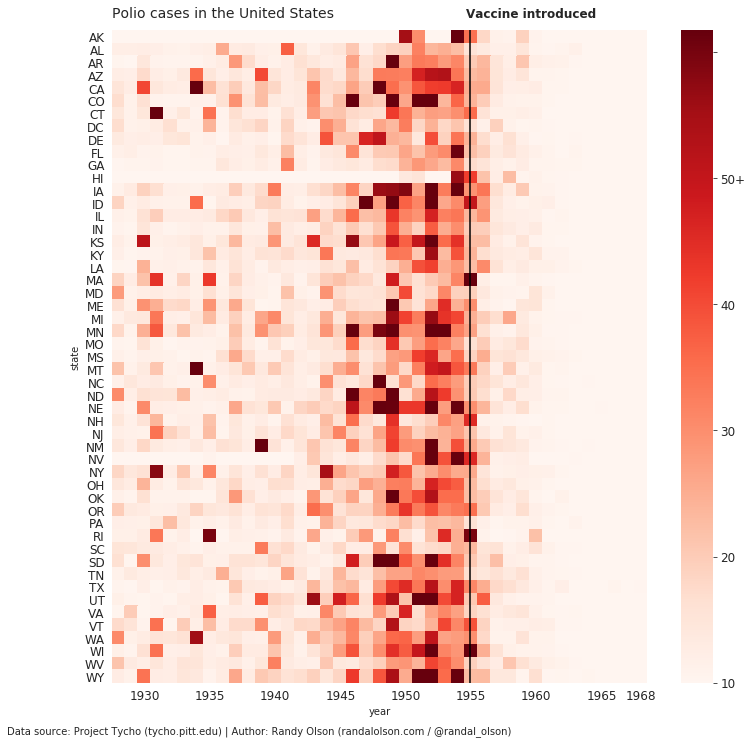

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(polio_mat, cmap='Reds', robust=True,
           xticklabels=[year if year % 5 == 0 or year == max(polio_years) else '' for year in polio_years],
           yticklabels=polio_states)

plt.plot([polio_years.index(1955) + 0.425, polio_years.index(1955) + 0.425],
         [0, 51],
         color='black', lw=1.5)

cax = plt.gcf().axes[-1]
cax.set_yticklabels([10, 20, 30, 40, '50+'])
cax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(0, -1, 'Polio cases in the United States', fontsize=14)
plt.text(polio_years.index(1955) + 0.15, -1, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(-8, 55, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10);

# plt.savefig('polio-cases-heatmap-sequential-colormap.png', bbox_inches='tight')

# Visualize the Polio data as a line chart

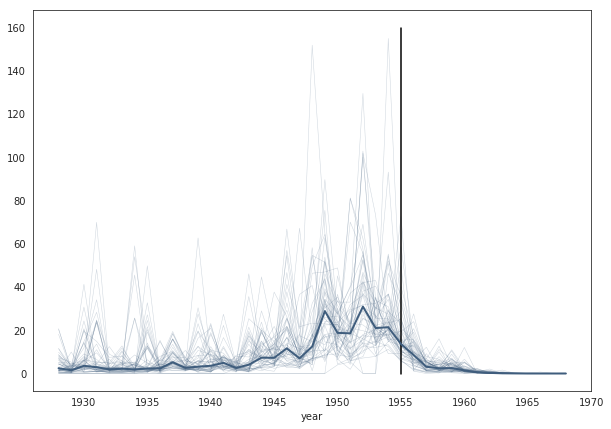

In [33]:
polio_mat.transpose().plot(color='#3F5D7D', alpha=0.25, lw=0.5, legend=False, figsize=(10, 7))
plt.plot([1955, 1955], [0, 160], color='black', lw=1.5)
polio_mat.median().plot(color='#3F5D7D', lw=2)

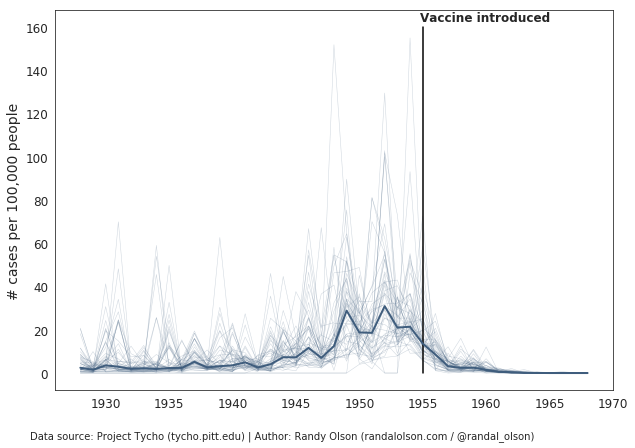

In [37]:
polio_mat.transpose().plot(color='#3F5D7D', alpha=0.25, lw=0.5, legend=False, figsize=(10, 7))
plt.plot([1955, 1955], [0, 160], color='black', lw=1.5)
polio_mat.median().plot(color='#3F5D7D', lw=2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('# cases per 100,000 people', fontsize=14)

plt.text(1954.75, 163, 'Vaccine introduced', fontsize=12, weight='bold')
plt.text(1924, -30, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Randy Olson (randalolson.com / @randal_olson)',
         fontsize=10);

# plt.savefig('polio-cases-line-chart-raw.png', bbox_inches='tight');


# Display the Polio data as small multiples

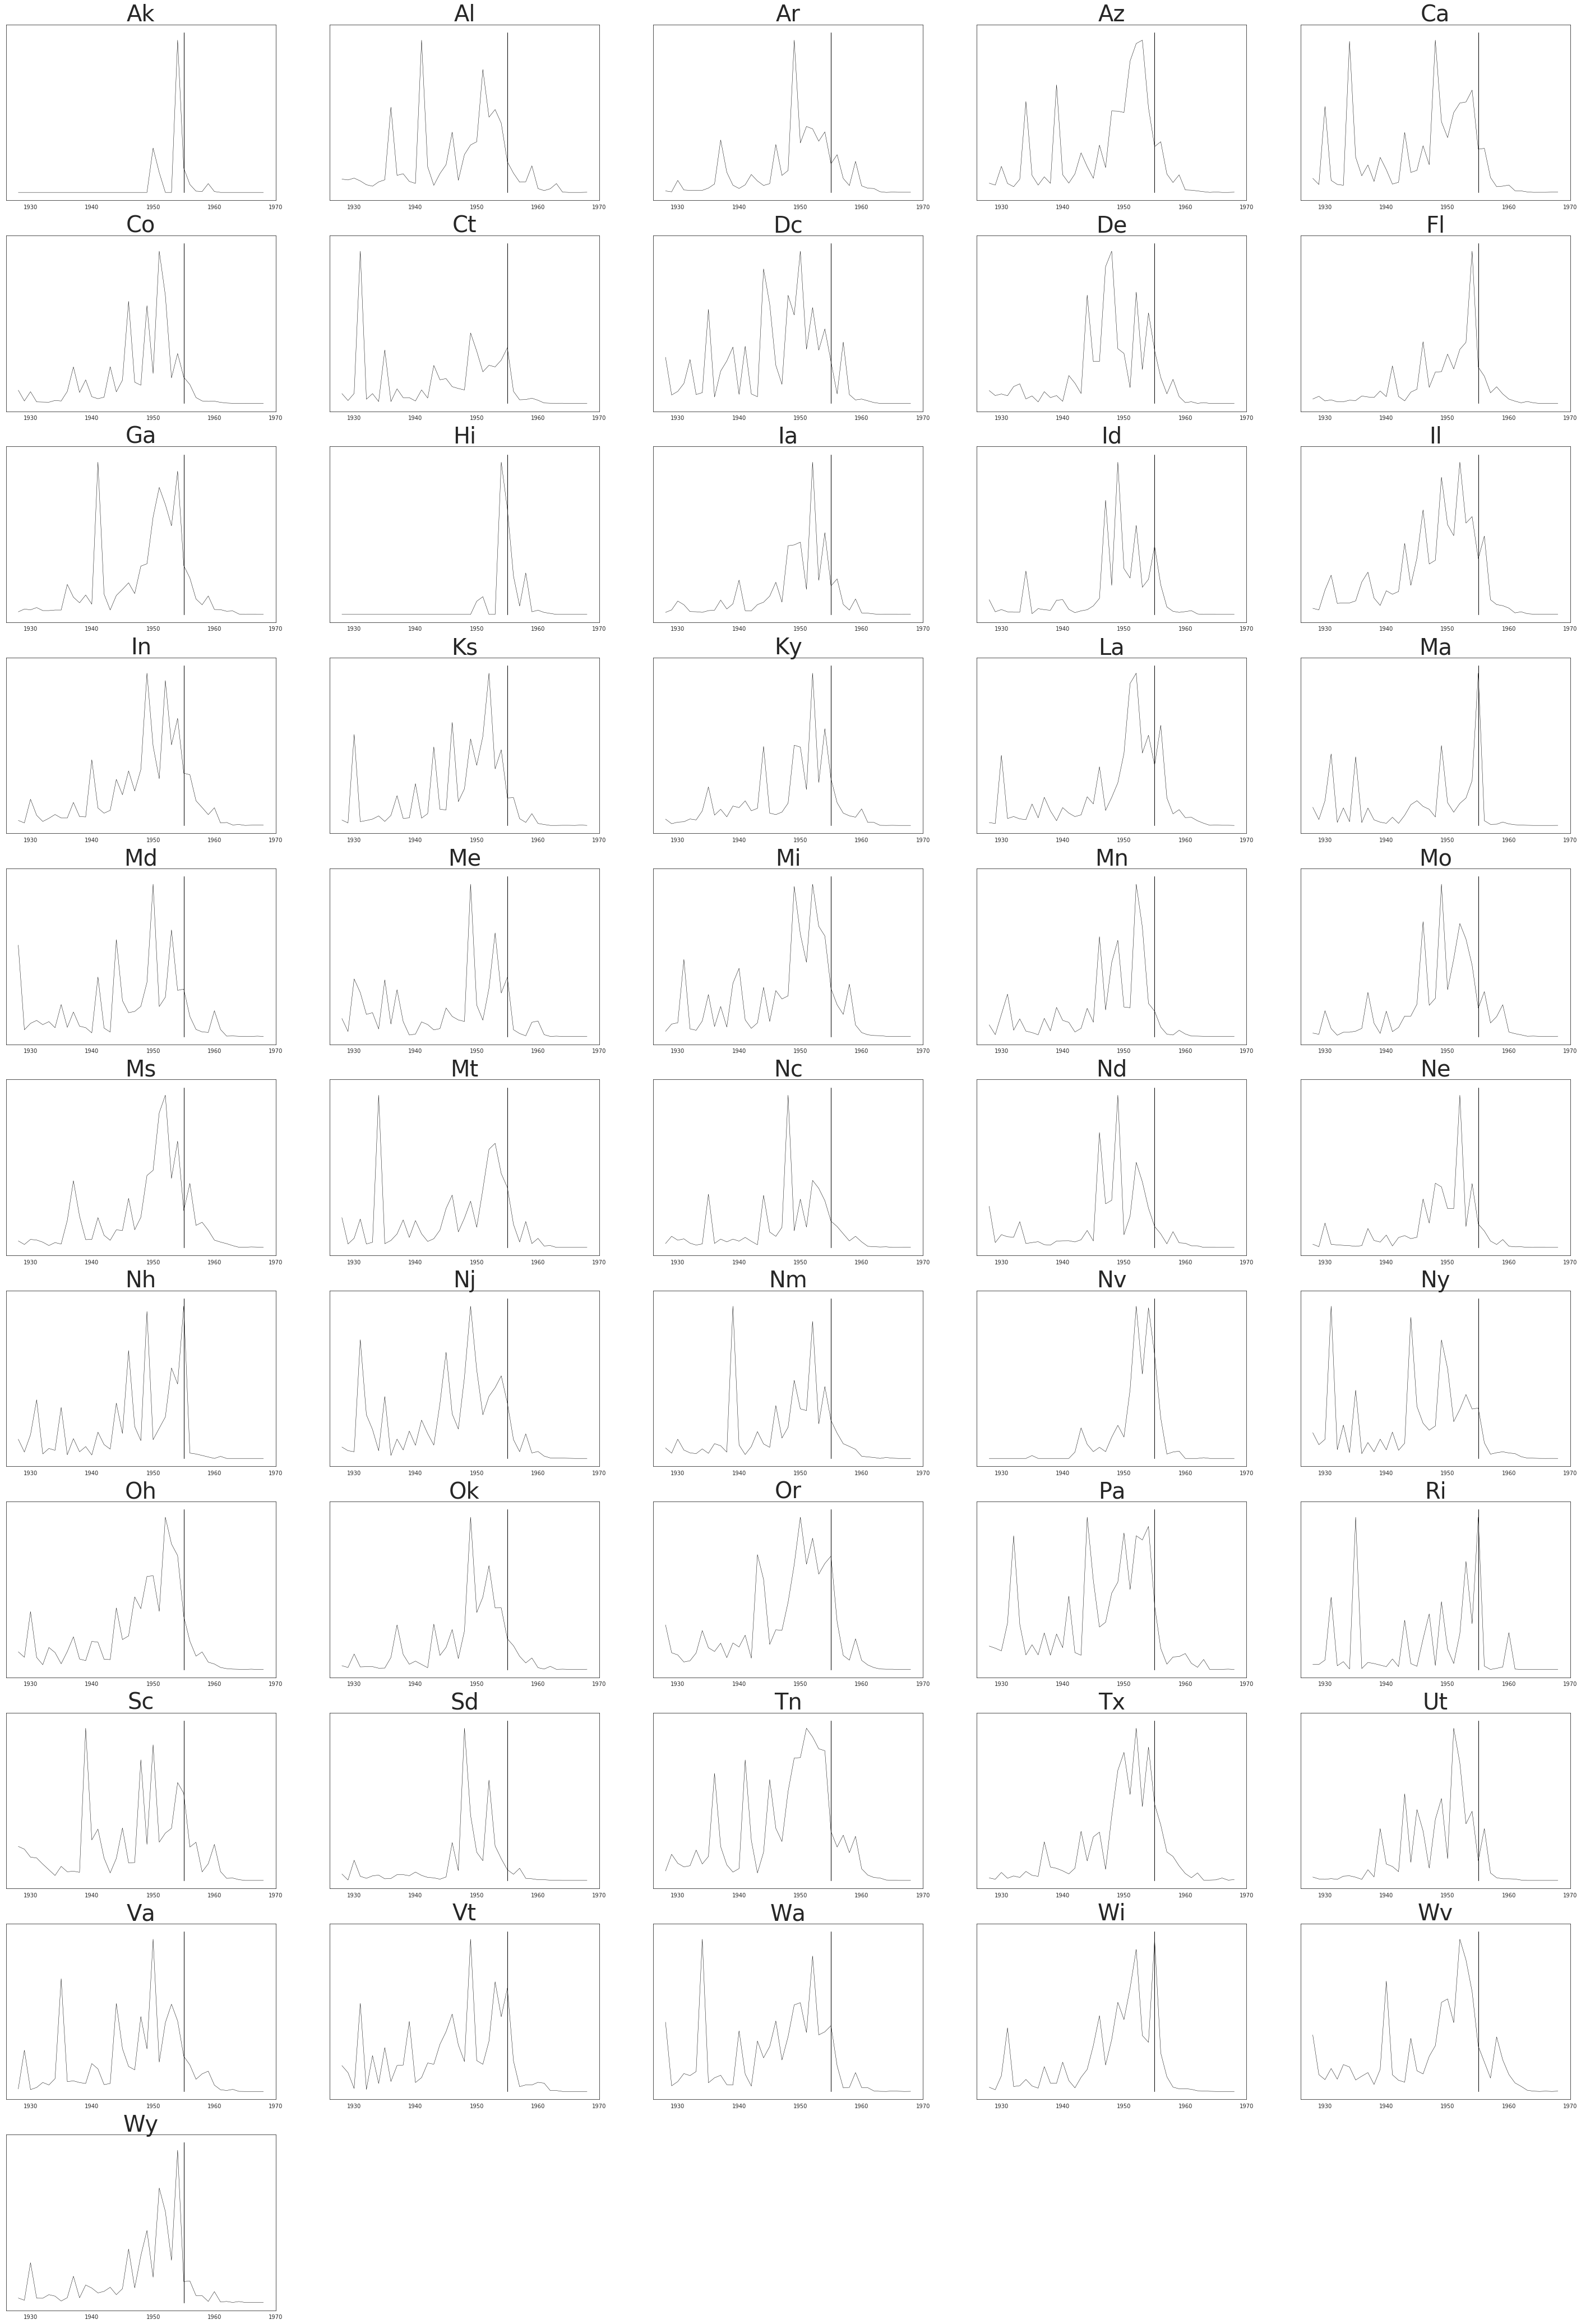

In [52]:
polio_m = polio_mat.transpose()

plt.figure(figsize=(50, 75))

column_count = 0
for column in polio_m.columns.values:
    column_count += 1
    column_num = column_count
    state_name = column.title()
    
    plt.subplot(11, 5, column_num)
    polio_m[column].fillna(0.).plot(color='black', lw=0.5)
    plt.plot([1955, 1955], [0, plt.ylim()[1]], color='black', lw=1)
    
    plt.xticks(range(1930, 1971, 10))
    
    plt.yticks([])
    plt.xlabel('')
    plt.title(state_name, fontsize=40)
    

